# **TASK 6**

# **Prediction using Decision Tree Algorithm**

***

## 1. **Importing Libraries**


> **Visualization and Plotting Libraries**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt


> **ML Libraries**

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import datasets
from sklearn import tree

## Loading the dataset

In [3]:
df=pd.read_csv('iris.csv')

## **Checking top 5 rows of the dataframe**

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

## **Determining if the dataset is complete**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Dropping useless columns

In [7]:
df.drop(['Id'], axis=1, inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## **Defining X and Y variable as input and outputs**

> 1. **The first four columns are input columns for the model.**
> 2. **The target column is the species**.

In [9]:
X=df.values[:,0:4]
Y=df.Species

In [10]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## **Splitting X and Y variables as training and testing data.**
> **The test size is kept as 30% of the total dataset, rest 70% is the training data.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

## Defining the decision tree classifier

In [13]:
cl= DecisionTreeClassifier(random_state = 100)

## Fitting the training data


In [14]:
cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

## Inserting some random data to predict species

In [15]:
X=[[9.4,8.5,3.7,9.5]]

> Predicting the species using decision tree classifier.

In [16]:
Y_pred=cl.predict(X)
print(Y_pred)

['Iris-versicolor']


> Predicting the species of test data set.

In [17]:
Y_pred=cl.predict(X_test)
print(Y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


## Checking the Accuray of the model 

> We check the accuracy of the model by comparing the predicted values(Y_pred) with the y_test data. 

In [18]:
print("Accuracy of the model:",accuracy_score(y_test, Y_pred))
con_mat=np.array(confusion_matrix(y_test,Y_pred))
print("\nCONFUSION MATRIX")
con_mat

Accuracy of the model: 0.9555555555555556

CONFUSION MATRIX


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]], dtype=int64)

> **The accuracy of the model is 95.55%.**

## Plotting the Tree.

[Text(267.84000000000003, 489.24, 'PetalLengthCm <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Iris-setosa'),
 Text(200.88000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(334.80000000000007, 380.52000000000004, 'PetalWidthCm <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Iris-setosa'),
 Text(133.92000000000002, 271.8, 'PetalLengthCm <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Iris-setosa'),
 Text(66.96000000000001, 163.08000000000004, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-setosa'),
 Text(200.88000000000002, 163.08000000000004, 'SepalLengthCm <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-setosa'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-setosa'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-setosa'),
 T

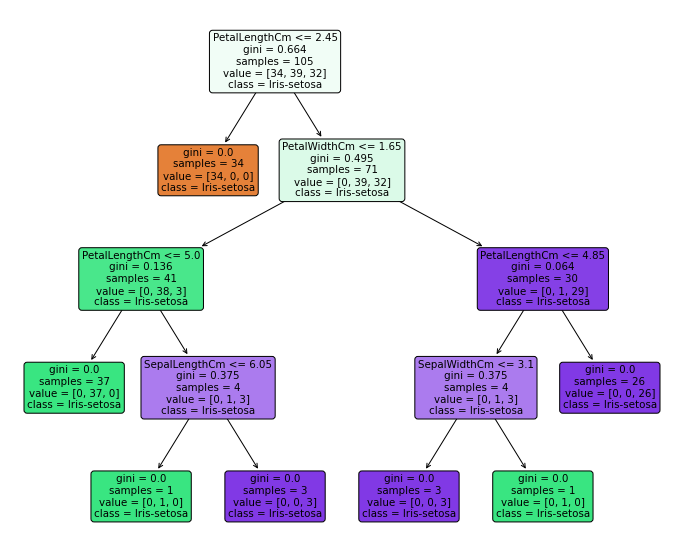

In [19]:
fname = df.columns[:4]
tname = df['Species']
plt.figure(figsize=(12,10))
tree.plot_tree(cl, 
          feature_names = fname, 
          class_names = tname, 
          filled = True, 
          rounded = True)

## The decision making process in decision tree classifier.


In [20]:
print(tree.export_text(cl))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



# THANK-YOU!